In [17]:
import sys
import numpy as np

sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/hdphmmda/testing', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm', '/Users/david/Documents/mastersCode/ubm']


In [18]:
import pickle
from importlib import reload
import numpy as np

In [19]:
# Load state sequence and data from the pickle file
with open('/Users/david/Documents/mastersCode/ubm/final/tests/train-test-val.pkl', 'rb') as file:
    loaded_train_test_val = pickle.load(file)

# Access the loaded data
# loaded_ss = loaded_data['state_sequence']
# loaded_data = loaded_data['data']

In [20]:
from final.useful import *

In [21]:
nfft = 128 # 64 # 32
labels = np.unique(loaded_train_test_val['train'].sample_labels)
# get_log_power_feature()

In [22]:
train_labels = loaded_train_test_val['train'].sample_labels
train_samples = loaded_train_test_val['train'].samples
humpback_indices = train_labels == 0
train_samples_humpback = [item for item, condition in zip(train_samples, humpback_indices) if condition]


In [23]:
def get_feature(sample, nfft):
    feat = np.log(np.square(np.abs(librosa.stft(sample, n_fft=nfft)).T))
    return feat

In [24]:
train_features_humpback = []
for sample in train_samples_humpback:
    train_features_humpback.append(get_feature(sample, nfft))

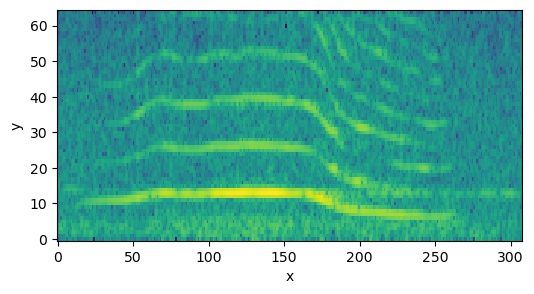

In [25]:
vis_helper(train_features_humpback[0])

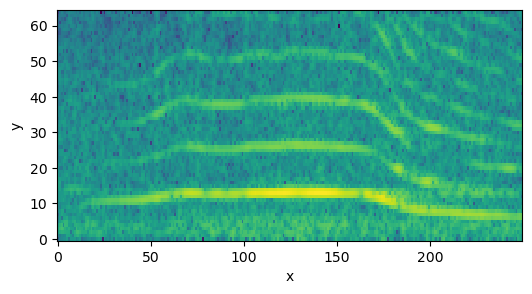

In [26]:
train_features_humpback_concat = np.concatenate(train_features_humpback)
smaller_features = train_features_humpback_concat[:250,:]
np.min(smaller_features)
vis_helper(smaller_features)

In [15]:
# import final.models.hdphmm.hdphmmda.hdp_hmm_da as hdp_hmm_da
# reload(hdp_hmm_da)
# import final.models.hdphmm.hdphmmda.hdp_hmm_da_utils.utils as utils
# reload(utils)
# from final.models.hdphmm.hdphmmda.hdp_hmm_da_utils.hdp_hmm_da_consts import *
# sbp = {
#     GAMMA0: 10,
#     ALPHA0: 100,
#     KAPPA0: 5,
# }
# sbp[RHO0] = sbp[KAPPA0] / ( sbp[KAPPA0] + sbp[ALPHA0])
# temp = 1
#
# hdp_hmm = hdp_hmm_da.InfiniteDirectSamplerHMM(smaller_features, 5, Z_true=None, iterations=1, verbose=True, sbp=sbp, temp=1)
#
# import final.models.hdphmm.helpers.plot_hmm as plot_hmm
# reload(plot_hmm)

# plot_hmm.plot_hmm_data(smaller_features[:20,:], hdp_hmm.Z, hdp_hmm.K, hdp_hmm.hmm.means_, hdp_hmm.hmm.covars_, feature_a=11, feature_b=12)

# plt.scatter(pca_features[:, 0], pca_features[:, 5], c=hdp_hmm.Z, cmap='viridis', marker='o')

sbp_prior


<module 'final.models.hdphmm.helpers.plot_hmm' from '/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/helpers/plot_hmm.py'>

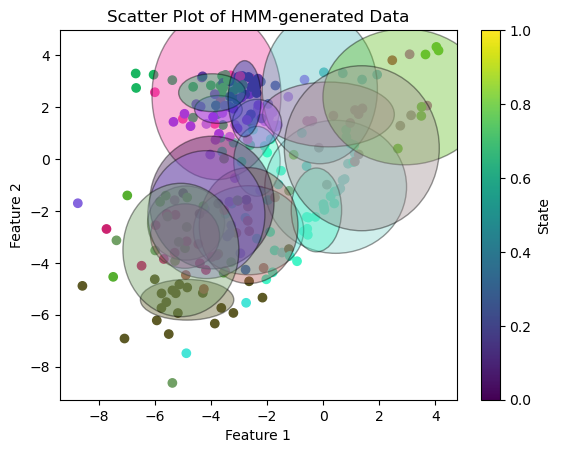

In [39]:
# testing bayesian HMM
import final.models.hdphmm.bhmm.bhmm as bhmm
reload(bhmm)
bhmm = bhmm.BayesianHMM(smaller_features, K=20, Z_true=None, iterations=100)
import final.models.hdphmm.helpers.plot_hmm as plot_hmm
reload(plot_hmm)
plot_hmm.plot_hmm_data(smaller_features, bhmm.Z, bhmm.K, bhmm.mu, bhmm.sigma, feature_a=11, feature_b=12)

In [40]:
bhmm.fit()

starting gibbs sampling
completed gibbs sampling


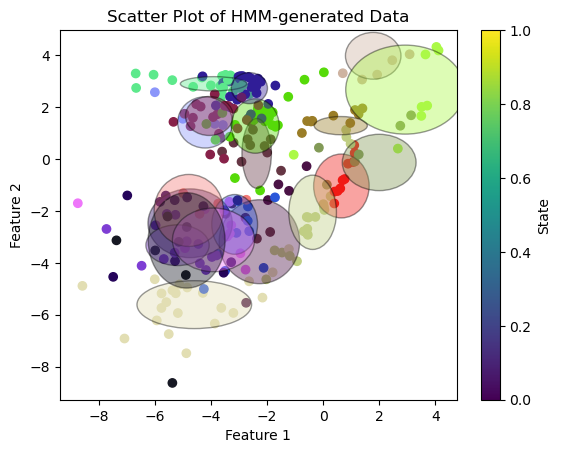

In [41]:
plot_hmm.plot_hmm_data(smaller_features, bhmm.Z, bhmm.K, bhmm.mu, bhmm.sigma, feature_a=11, feature_b=12)

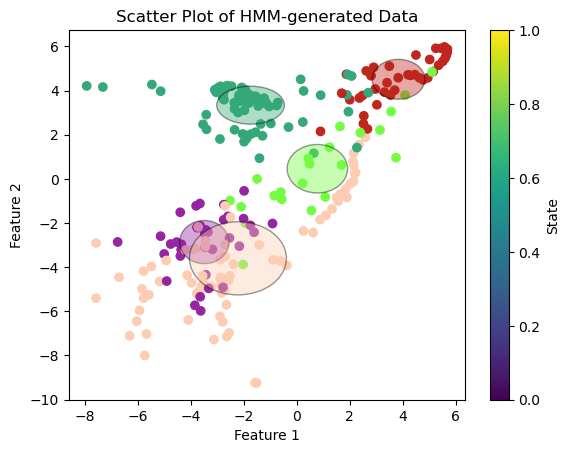

In [21]:
plot_hmm.plot_hmm_data(smaller_features, hdp_hmm.Z, hdp_hmm.K, hdp_hmm.hmm.means_, hdp_hmm.hmm.covars_, feature_a=11, feature_b=12)

In [20]:
np.mean(hdp_hmm.track[TIME])

3.2141662538051605